# Анализ рынка компьютерных игр

**Шаг 1. Откроем файл с данными и изучим общую информацию**

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import scipy.stats
from scipy.stats import t

In [5]:
df = pd.read_csv('/datasets/games.csv')

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Шаг 2. Подготовьте данные**

In [9]:
#приведем все названия столбцов к единому нижнему регистру
df.columns = df.columns.str.lower()

In [10]:
#посмотрим на пропуски данных
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
df['genre'] = df['genre'].fillna('Unknown Genre')

In [12]:
df['name'] = df['name'].fillna('Unknown Name')
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [13]:
df.dropna(subset=['year_of_release'], inplace=True)
#год релиза приведем к соответствующему типу
df['year_of_release'] = df['year_of_release'].astype(int)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
medians = df.groupby('genre')['critic_score'].median()
print(medians)
row = df['genre'].unique()
for i in row:
    df.loc[df['genre'] == i, 'critic_score'] = df.loc[df['genre'] == i, 'critic_score'].fillna(medians[i])
df.head()   

genre
Action           68.0
Adventure        66.0
Fighting         72.0
Misc             69.0
Platform         69.5
Puzzle           70.0
Racing           69.0
Role-Playing     74.0
Shooter          73.0
Simulation       70.0
Sports           75.0
Strategy         73.0
Unknown Genre     NaN
Name: critic_score, dtype: float64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,NaN,NaN


In [15]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          2
user_score         6607
rating             6678
dtype: int64

In [16]:
bool1 = pd.isnull(df['critic_score']) # Посмотрим на оставшиеся пропуски в critic_score. 
df[bool1]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown Name,GEN,1993,Unknown Genre,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown Name,GEN,1993,Unknown Genre,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [17]:
#dctuj 2 строки с пропусками и они практически не содержат данных, поэтому удалим их.
df = df[df['critic_score'].notna()] 


In [18]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6605
rating             6676
dtype: int64

In [19]:
#Поскольку в столбце user_score имеются значения, требующие уточнения (tbd), то для начала очистим наши данные от данных, требующих уточнения
tbd = df.loc[df['user_score'] == "tbd"]
df = df.loc[df['user_score'] != "tbd"]
#"Очищенные" данные переведем в числовой формат и заполним пропуски медианными значениями  в зависимости от жанра
df['user_score'] = pd.to_numeric(df['user_score'])
groups = df.groupby('genre')['user_score'].median()
row = df['genre'].unique()
for i in row:
    df.loc[df['genre'] == i, 'user_score'] = df.loc[df['genre'] == i, 'user_score'].fillna(groups[i])

#Теперь обработаем "tbd-оценки" пользователей. Для начала заменим "tbd-оценки" на значения типа NaN
tbd['user_score'] = np.nan
#Теперь сможем заменить значения Nan на медианные значения в зависимости от жанра 
row = tbd['genre'].unique()
for i in row:
    tbd.loc[tbd['genre'] == i, 'user_score'] = tbd.loc[tbd['genre'] == i, 'user_score'].fillna(groups[i])
    
#Теперь объединим обратно оба датафрейма
frames = [df, tbd]
df = pd.concat(frames)



In [20]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [21]:
df['rating'] = df['rating'].fillna('no rating')

In [22]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [23]:
#Добавим столбец "total_sales"
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.5,7.7,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,no rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,no rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,no rating,28.31


**Шаг 3. Проведите исследовательский анализ данных**

In [25]:
# Кол-во игр, вышедших по годам
df.groupby('year_of_release').size() 

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
dtype: int64

<AxesSubplot:xlabel='year_of_release'>

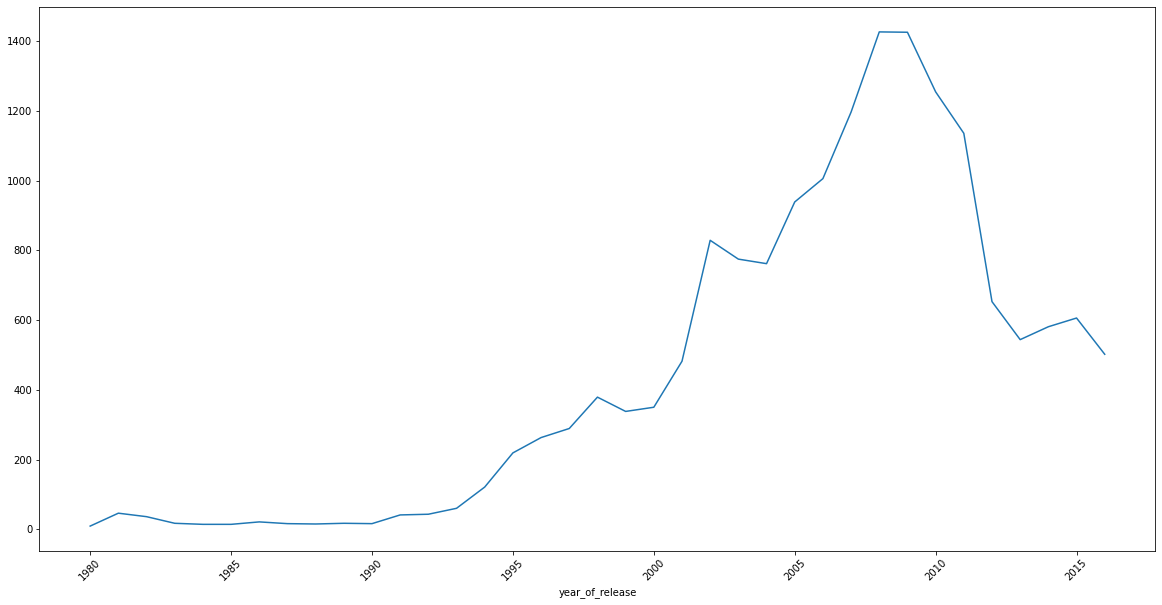

In [26]:
df.groupby('year_of_release').size().plot(kind='line', rot=45, figsize=(20,10))

Как мы видим на графике, развитие индустрии компьютерных игр с середины 90-ых годов начинает устойчивый рост, с бурным пиком к 2007-2010 гг.  Затем наблюдается спад который обусловлен,  по видимому, вытеснением десктопных устройств мобильными гаджетами со своими игровыми сервисами.
Наибольшую ценность для нас будут иметь данные начиная с 1994 по 2016 гг.

In [27]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [28]:
# Посмотрим распределение выручки от продажи игр по платформам
platforms_df = df.groupby('platform')[['total_sales']].sum()
    
platforms_df.columns = ['total_sales']
platforms_df.sort_values('total_sales', ascending=False, inplace=True)

trace = go.Bar(
    x=platforms_df.index,
    y=platforms_df.total_sales,
)
data = [trace]
layout = {'title': 'Общая выручка по платформам', 'xaxis': {'title': 'platform'}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

Лидерами продаж (со значительным отрывом) являются платформы PS2, X360, PS3, Wii, DS и PS (так сказать ТОП-6)

In [29]:
# сгруппируем суммарные продажи по платформам и годам
sales_by_platform=(df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
                   .reset_index())

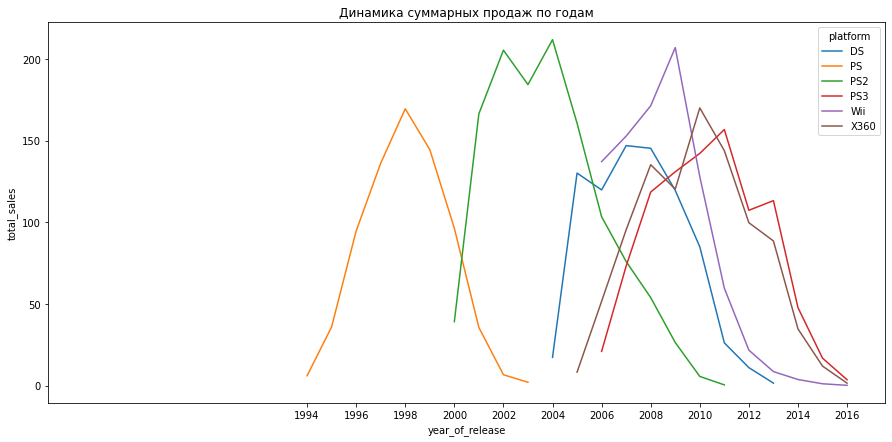

In [30]:
# построим график динамики суммарных продаж по годам для ТОП-6 платформ. Для этого:
# создалим топ-6 платформ по продажам:
top_platforms=(df.groupby('platform')['total_sales']
                .sum()
                .sort_values(ascending=False)[:6]
                .reset_index())

# возьмем в датафрейме sales_by_platform наш топ-6 и выведем график продаж по годам
sales_by_platform['top6'] = (sales_by_platform.platform.isin(top_platforms.platform) == True)
(sales_by_platform[sales_by_platform['top6']==True]
     .set_index('platform').T.drop('top6')
     .plot(figsize=(15,7))
     .set(xlabel='year_of_release', ylabel='total_sales'))
plt.title('Динамика суммарных продаж по годам')
plt.xticks([y for y in range(1994,2017)[1994%2::2]]);

Из графика можем видеть, что платформы-лидеры по продажам в среднем проходят 7-10-летний цикл в своеи развитиии. Окло 2-3-х лет уходит на достижение пика продаж с момента релиза игры, затем около 2-х лет продажи держатся на макимальных значениях и постепенно в течение 2-5 лет сходят на минимум, усьупая место новым.  
Исходя из всех предыдцщих данных возьмем для дальнейшего анализа как "актуальный период" 2014-2016 гг.

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
dtype: float64

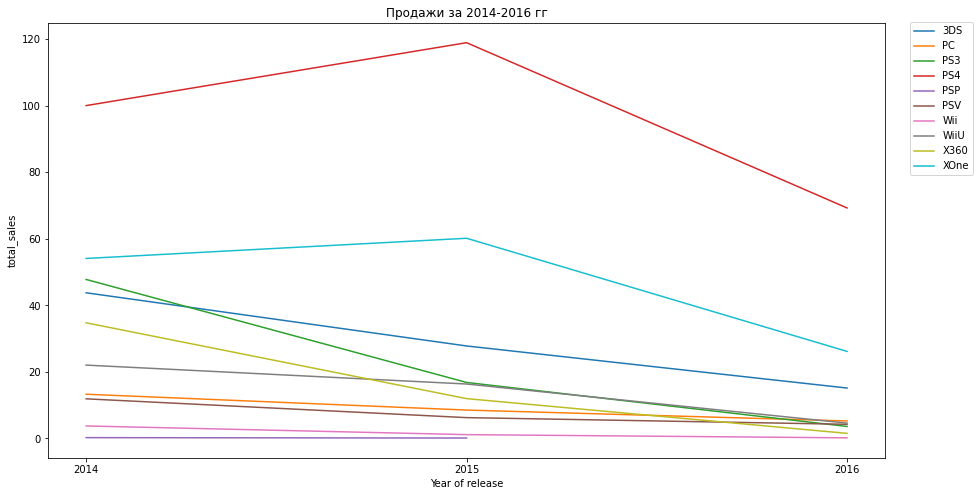

In [31]:
#Проанализируем платформы по динамике продаж за "актуальный период".
#Для этого выделим в отдельный датафрейм те игры, которые были выпущены после 2011 года
list_of_years=[ y for y in range(2014, 2017)]
df_2014_2016=df[df['year_of_release'].isin(list_of_years)]

#построим график общих продаж для платформ за "актуальный период"
platforms_actual=df_2014_2016.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')

(platforms_actual.T
     .plot(figsize=(15,8), title='Продажи за 2014-2016 гг')
     .set(xlabel='Year of release', ylabel='total_sales'));
plt.xticks([y for y in range(2014,2017)[2014%2::1]]);
plt.legend(loc=(1.03,0.65));
platforms_actual.T.sum().sort_values(ascending=False).head()

platform
PS4     376.0
PSV     295.0
XOne    228.0
PS3     219.0
3DS     212.0
dtype: float64

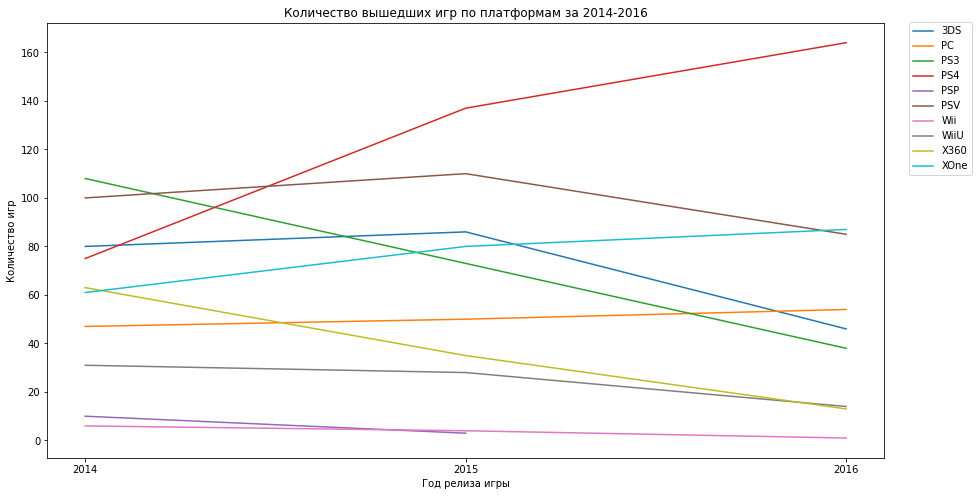

In [32]:
#Посмотрим на платформы по количеству выпущенных игр за "актуальный период".
games_by_platform_actual=df_2014_2016.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count')

ax=games_by_platform_actual.T.plot(figsize=(15,8), title='Количество вышедших игр по платформам за 2014-2016');
ax.set(xlabel='Год релиза игры', ylabel='Количество игр')
plt.xticks([y for y in range(2014,2017)[2014%2::1]]);
plt.legend(loc=(1.03,0.65));
games_by_platform_actual.T.sum().sort_values(ascending=False).head()

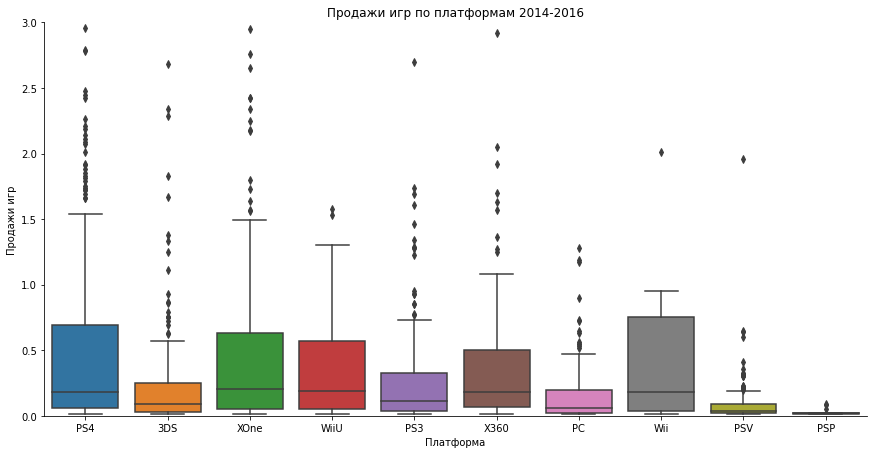

In [33]:
#Посмотрим на средние продажи по платформам:
ax=sns.catplot(x="platform", y="total_sales",
            kind="box", dodge=False, data=df_2014_2016, height=6, aspect=2)\
            .set(title='Продажи игр по платформам 2014-2016', ylim=(0,3))
ax.set(xlabel='Платформа', ylabel='Продажи игр');

По графикам видно, что лидерами по продажам и выпущенным играм за последние 3 года являются платформы Wii, PS4, XOne и WiiU. Можно предположить, что данные платформы имеют наибольший потенциал по выпуску и продажам игр на следующий год. Остальные платформы либо стагнируют, либо находятся в самом конце своего "жизненного цикла". 


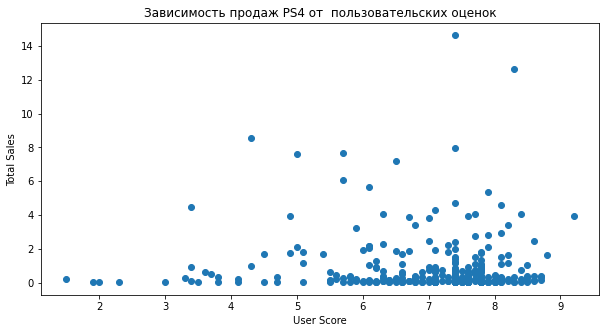

1.0

In [34]:
#Посмотрим зависимость продаж одной из лидирующих платформ-PS4 от оценок пользователей
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['user_score'], y = df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['total_sales'])
plt.xlabel("User Score")
plt.ylabel("Total Sales")
plt.title('Зависимость продаж PS4 от  пользовательских оценок')
plt.show()

df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['total_sales'].corr(df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['total_sales'])

Зависимость продаж от пользовательских оценок прямая и очень сильная. Кожффициент корреляции 1

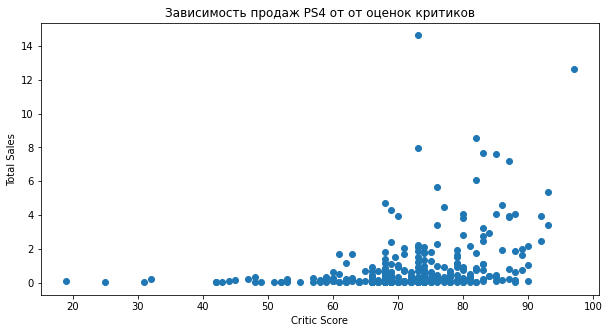

0.34616355123267806

In [35]:
#Посмотрим корреляцию
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['critic_score'], y = df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['total_sales'])
plt.xlabel("Critic Score")
plt.ylabel("Total Sales")
plt.title('Зависимость продаж PS4 от от оценок критиков')
plt.show()

df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['critic_score'].corr(df_2014_2016.loc[df_2014_2016['platform'] == 'PS4']['total_sales']) 

Влияние оценок критиков на продажи тоже прямое, но намного слабее. Коэффициент корреляции 0,35 

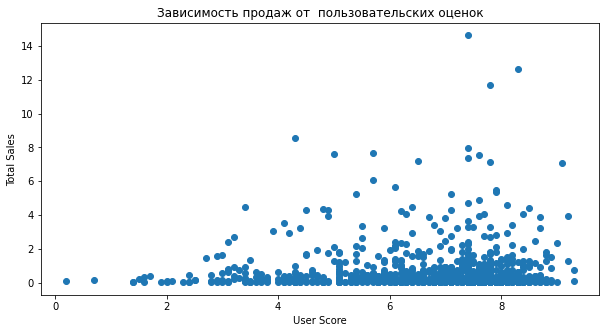

1.0

In [36]:
#Посмотрим зависимость продаж от пользовательских оценок по всем платформам
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_2014_2016['user_score'], y = df_2014_2016['total_sales'])
plt.xlabel("User Score")
plt.ylabel("Total Sales")
plt.title('Зависимость продаж от  пользовательских оценок')
plt.show()

df_2014_2016['total_sales'].corr(df_2014_2016['total_sales'])

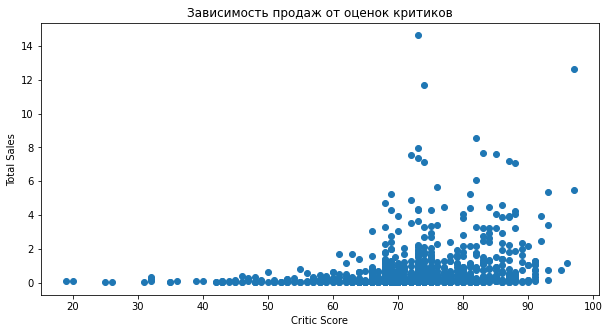

0.2829476057098637

In [37]:
#Посмотрим зависимость продаж от оценок критиков по всем платформам
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = df_2014_2016['critic_score'], y = df_2014_2016['total_sales'])
plt.xlabel("Critic Score")
plt.ylabel("Total Sales")
plt.title('Зависимость продаж от оценок критиков')
plt.show()

df_2014_2016['critic_score'].corr(df_2014_2016['total_sales']) 

По всем платформам в целом прослеживается такая же прямая и сильная зависимость продаж от пользовательских оценок и более слабая от оценок критиков.

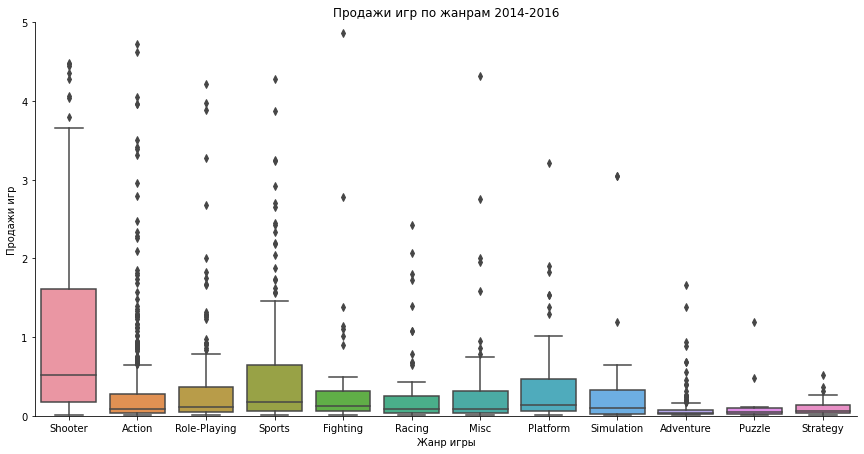

In [38]:
#Посмотрим на средние продажи по жанрам
ax=sns.catplot(x="genre", y="total_sales",
            kind="box", dodge=False, data=df_2014_2016, height=6, aspect=2)\
            .set(title='Продажи игр по жанрам 2014-2016', ylim=(0,5))
ax.set(xlabel='Жанр игры', ylabel='Продажи игр');

Среди жанров игр лидерами по медианным продажам являются Shooter, Sports и Platform

<AxesSubplot:xlabel='platform'>

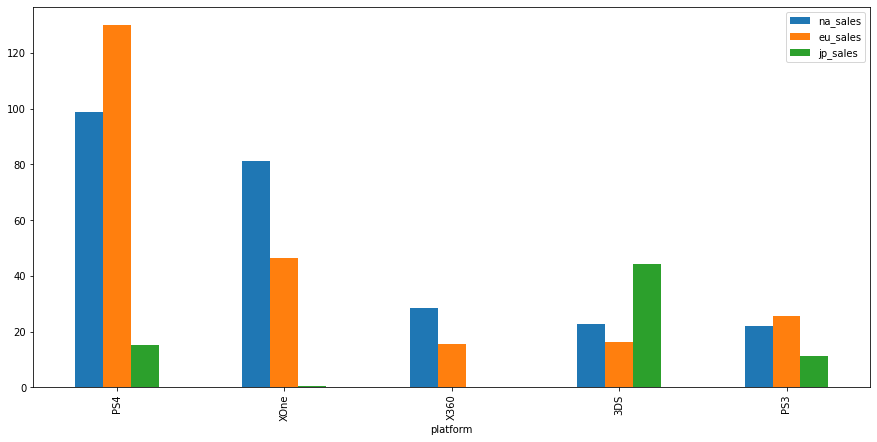

In [39]:
#Топ-5 самых популярных платформ по регионам продаж
df_2014_2016.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].agg(sum).sort_values(by= 'na_sales', ascending=False).head().plot(kind='bar', figsize=(15, 7))

Лидерами по продажам в Северной америке и в Европе являются платформы PS4 и XOne  
В Японии пользователи отдают явное предпочтение платфомам 3DS, а платформа Xbox One в явных аутсайдерах на японском рынке (возможно ее продажи на японском рынке временно не осуществляются)

<AxesSubplot:xlabel='genre'>

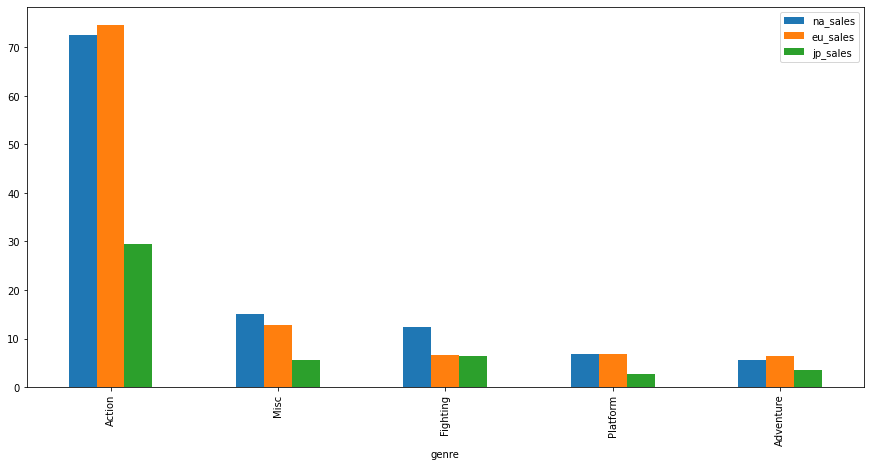

In [40]:
#Топ-5 самых популярных жанров по регионам продаж
df_2014_2016.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].agg(sum).head(5).sort_values(by= 'na_sales', ascending=False).head().plot(kind='bar', figsize=(15, 7))

Среди жанров проданных игр по всем регионам лидирует жанр Action, причем со значительным отрывом.

<AxesSubplot:xlabel='rating'>

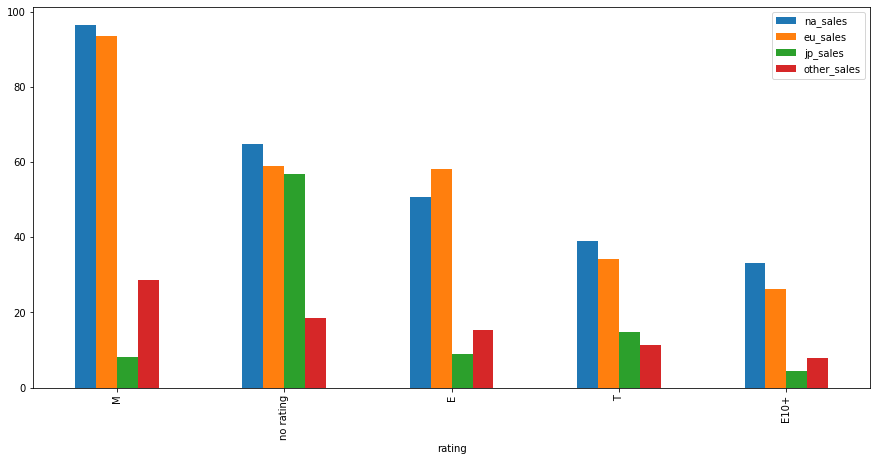

In [41]:
# Влияет ли рейтинг ESRB на продажи в отдельном регионе?
df_2014_2016.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].agg(sum).sort_values(by= 'na_sales', ascending=False).head(20).plot(kind='bar', figsize=(15, 7))

Можем сделать вывод о наличии зависимости продаж от рейтинга ESRB на североамериканском и европейстком рынках. Самые высокие продажи у игр с рейтингом М.  
В Японии самые высокие продажи у игр с "no_rating". Видимо это связано с использованием в Японии другой системы рейтинга игр

**Проверка гипотез**

Поскольку сравниваемые генеральные совокупности имеют достаточный размер и равны между собой по размеру (количество оценок в обеих совокупностях равное), можно испольщовать критерий Стьюдента

**Сравнение пользовательских оценок платформ Xbox One и PC**  
H_0: Средние пользовательские оценки Xbox One (sample_0) == Средние пользовательские оценки PC (sample_1)  
H_1: Средние пользовательские оценки Xbox One (sample_0) != Средние пользовательские оценки PC (sample_1)  

alpha: 0.05

In [42]:
from scipy import stats as st
from scipy.stats import f_oneway

alpha = 0.05
sample_0 = df.loc[(df['platform'] == 'PS'), 'user_score']
sample_1 = df.loc[(df['platform'] == 'XOne'), 'user_score']
results = st.ttest_ind(sample_0, sample_1)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  1.399889865032334e-50
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC разные, так как мы отвергли нулевую гипотезу, основанную на задании, а мы отвергли ее. То есть пользовательские рейтинги платформ разные.
Так нам даны две генеральные совокупности, и нам нужно сравить их средние. Для этого мы использовали st.ttest_ind для проведения двустороннего теста проверки равенства среднего двух генеральных совокупностей. Используем alpha=0.05, так как значений в совокупностях немного. 
Мы обозначили нулевую и альтернативную гипотезы:  
Нулевая гипотеза -cредние двух совокупностей равны  
Альтернативная гипотеза - cредние двух совокупностей различны  
Так как мы отвергаем нулевую гипотезу, значит, альтернативная гипотеза верна. Отсюда следует, что средние двух совокупностей различны.

**Сравнение пользовательских оценок жанров Action и Sports**  
H_0: Средние пользовательские оценки Action (sample_0) == Средние пользовательские оценки Sports (sample_1)  
H_1: Средние пользовательские оценки Action (sample_0) != Средние пользовательские оценки Sports (sample_1) 

alpha: 0.05

In [43]:
from scipy import stats as st
from scipy.stats import f_oneway

alpha = 0.05
sample_0 = df.loc[df['genre'] == 'Action', 'user_score']
sample_1 = df.loc[df['genre'] == 'Sports', 'user_score']
results = st.ttest_ind(sample_0, sample_1)
print('p-значение: ', results.pvalue)
if results.pvalue< alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение:  0.4059173001251195
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action  и Sports разные.  
Нам даны две генеральные совокупности, и нам нужно сравить их средние. Для этого мы использовали st.ttest_ind для проведения двустороннего теста проверки равенства среднего двух генеральных совокупностей. Используем alpha=0.05, так как значений в совокупностях немного.  
Мы обозначили нулевую и альтернативную гипотезы:   
Нулевая гипотеза - Средние двух совокупностей равны.   
Альтернативная гипотеза - Средние двух совокупностей различны.  
Так как мы не можем отвергнуть нулевую гипотезу, значит, нулевая гипотеза верна

**Вывод**

В своей работе Я провел анализ продажи компьютерных игр различных платформ, жанров на различных рынках (региолнах продаж).  
В процессе исследовательского анализа данных мы выявили, что развитие индустрии компьютерных игр с середины 90-ых годов начинает устойчивый рост, с бурным пиком к 2007-2010 гг. Затем наблюдается спад который обусловлен, по видимому, вытеснением десктопных устройств мобильными гаджетами со своими игровыми сервисами. Лидерами продаж (со значительным отрывом) являются платформы PS2, X360, PS3, Wii, DS и PS.  
Окло 2-3-х лет уходит на достижение пика продаж с момента релиза игры, затем около 2-х лет продажи держатся на макимальных значениях и постепенно в течение 5 лет сходят на минимум, усьупая место новым.
Исходя из всех предыдцщих данных возьмем для дальнейшего анализа как "актуальный период" 2014-2016 гг.
Из анализа актуального периода видим, что лидерами по выпущенным играм за последние 3 года являются платформы PS4, PSV и XOne. Можно предположить, что данные платформы имеют наибольший потенциал по выпуску и продажам игр на следующий год. Остальные платформы либо стагнируют, либо находятся в самом конце своего "жизненного цикла".
Наибольшие средние продажи в 2014-2016 гг. отмечаются у платформ: Wii, PS4, XOne и WiiU  
На величину продаж сильно влияют пользовательские оценки (клэффициент корреляции стремится к 1). Оценки критиков обладают значительно меньшим влиянием, хотя связь тоже прямая (коэффициент корреляции 0,3).  
Самые удачнве жанры с точки зрения продаж - Shooter, Sports и Platform.  
Проанализировав ТОП-5 самых успешных платформ на разных рынках сбыта, можно порекомендовать нашему "магазинчику" сконценгтрировать внимание в 2017 году на:
 Североамериканском рынке - платформы: PS4 и XOne в жанре Action с рейтингом ESRB в категориях М.     
 Европейском рынке - платформы: PS4 и XOne, в жанре Action с рейтингом ESRB в категориях М.  
 Японском рынке - платформы: 3DS в жанре Action.  
 